In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

In [4]:
datadir = "/content/drive/MyDrive/Tropical_fruit/train"

In [5]:
categories=['apple','avovado','banana','dragonfruit','kiwi','mango','orange','passionfruit','pinaple','watermelon']

In [6]:
img_size=128

[[193 200 206 ... 210 221 240]
 [209 182 186 ... 253 253 255]
 [255 236 210 ... 255 254 252]
 ...
 [ 20  38  50 ...  54  53  51]
 [ 13  27  35 ...  53  53  54]
 [ 19  25  26 ...  51  51  53]]


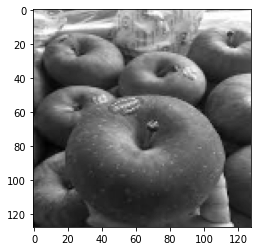

In [7]:
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [8]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 42/42 [00:29<00:00,  1.43it/s]

454


In [10]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)

In [11]:
print('x',x.shape)

x (454, 128, 128, 1)


In [12]:
print('y',y.shape)

y (454,)


In [13]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Tropical_fruit/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

In [14]:
pickle_out=open("/content/drive/MyDrive/Tropical_fruit/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [15]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [16]:
pickle_in = open("/content/drive/MyDrive/Tropical_fruit/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Tropical_fruit/Save/y.pickle","rb")
y= pickle.load(pickle_in)

In [17]:
X=X/255.0

In [18]:
X.shape

(454, 128, 128, 1)

In [19]:
y= to_categorical(y,10)

In [20]:
y.shape

(454, 10)

In [22]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [23]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [24]:
from tensorflow.keras.optimizers import SGD

In [25]:
opt =SGD()

In [26]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/100
6/6 [==============================] - 16s 449ms/step - loss: 3.6230 - accuracy: 0.0854 - val_loss: 3.1635 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 80ms/step - loss: 2.1820 - accuracy: 0.1598 - val_loss: 3.7306 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 80ms/step - loss: 2.0862 - accuracy: 0.1405 - val_loss: 4.1095 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 81ms/step - loss: 2.0983 - accuracy: 0.1846 - val_loss: 5.0857 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 81ms/step - loss: 2.1068 - accuracy: 0.1350 - val_loss: 6.3356 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 84ms/step - loss: 2.0957 - accuracy: 0.1570 - val_loss: 5.1101 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 85ms/step - loss: 2.0212 - accuracy: 0.1680 - val_loss: 5.7869 - val_accuracy: 0

In [28]:
model.save('Tropical__fruits.h5')

In [29]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [30]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(128, 128))	
	
	return img
labels = {0: 'apple',1: 'avovado',2: 'banana',3: 'dragonfruit',4: 'kiwi',5: 'mango',6: 'orange',7: 'passionfruit',8: 'pinaple',9: 'watermelon'}

In [31]:
model = load_model('Tropical__fruits.h5')

(1, 128, 128, 1)

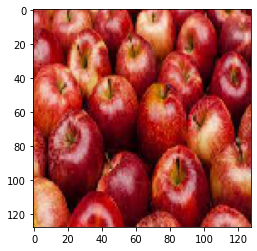

In [38]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/apple/apple (52).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [39]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation apple


(1, 128, 128, 1)

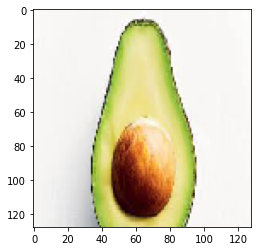

In [48]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/avovado/avocado (14).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [49]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation avovado


(1, 128, 128, 1)

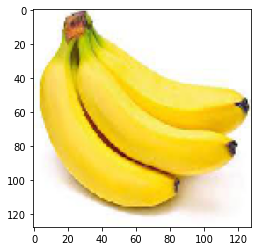

In [58]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/banana/banana (63).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [59]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation banana


(1, 128, 128, 1)

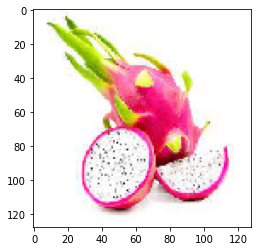

In [68]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/dragonfruit/dragonfruit (38).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [69]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation dragonfruit


(1, 128, 128, 1)

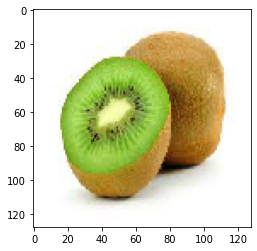

In [76]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/kiwi/kiwi (68).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [77]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation kiwi


(1, 128, 128, 1)

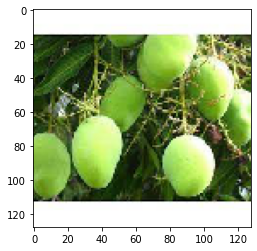

In [90]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/mango/xoai (33).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [91]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation apple


(1, 128, 128, 1)

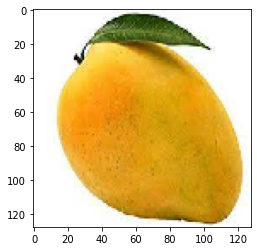

In [94]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/mango/xoai (53).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [95]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation mango


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation orange


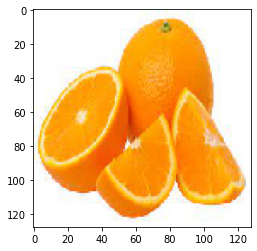

In [98]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/orange/orange (49).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation kiwi


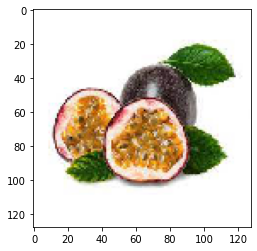

In [109]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/passionfruit/passionfruit (58).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation dragonfruit


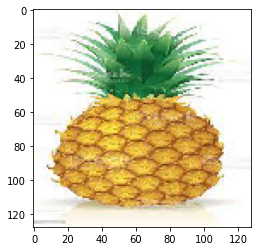

In [118]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/pinaple/pinaple (58).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation dragonfruit


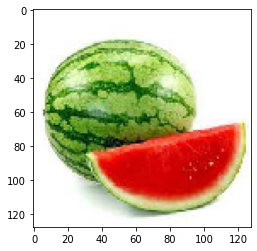

In [124]:
img = load_image('/content/drive/MyDrive/Tropical_fruit/test/watermelon/watermelon (50).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])